# Project 3: Monte Carlo Techniques
# Penetration of Neutrons Through Shielding
The task in this project is to develop a simulation of penetration of neutrons through a slab of
shielding of thickness T, considering only thermal neutrons, and the processes of absorption and
scattering.</p>**1. Introduction**</p>This project will be simulating thermal neutrons fired at different types of materials, investigating properties of different materials and the interactions between the neutrons and said material.The project focuses on the numerical integrating technique Monte Carlo method, enabling us to predict deterministic orders in chaotic systems. The set-up is simple: neutrons will be approximated to be point like particles that are fired at a sheet of material with infinite y and z components but a finite x length - i.e the thickness. Once the neutron reaches the material's boundary it has the possibility of being reflected. If the neutron does not, it passes through to enter the material and inside the material can be randomly absorbed or it will be scattered. Once scattered the process will repeat, checking if it has been absorbed or scattered again. The last possible outcome is that the thermal neutron is transmitted through the material, not interacting with the material. In essence, there are three main processes in this project: reflection, absorption and transmission. </p>The Monte Carlo's underlying concept is to use randomness to solve problems that might be deterministic in principle. The Monte Carlo integral can be written as an average</p> $$\int_{x_{1}}^{x_{2}} f(x)dx = (x_{2}-x_{1})<f(x))>.$$</p>For regular integration, the computational time increases with the order of $$N^{d},$$ however, Monte Carlo integration is independent of dimensions (d) and the resulting error is of the order $$\frac{1}{\sqrt{N}}.$$ </p>**2. Random Distributions**</p>A pseudo-random number generator (PRNG) produces a sequence of numbers that exhibits statistical randomness. </p>How does the numpy random uniform function work? It draws samples over a half open interval, with the bounds specified by the programmer. Numbers will be uniformly distributed over this range with equal probability of being chosen. A numpy array of random numbers are outputted.</p> To begin, I needed to confirm that the in-built random number generator **np.random.uniform()** can generate tables of numbers. Below I have shown this table in a graph, creating a plot of each random point's value against the number of points.</p>

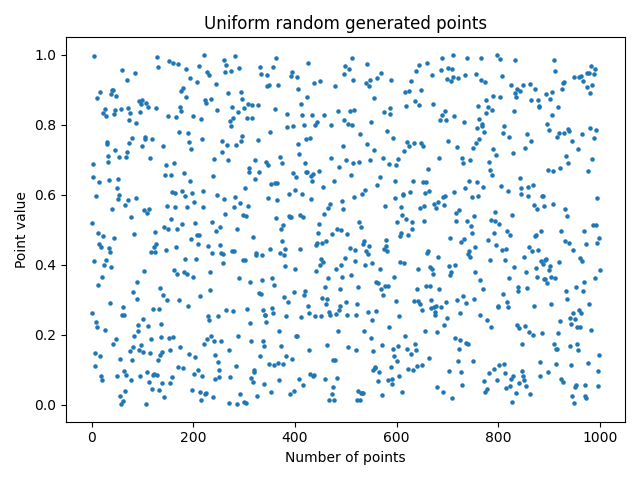

In [1]:
import numpy as np
from tqdm.notebook import tnrange
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import curve_fit
nparticles = 1000  #Number of particles
random_numbers = np.random.uniform(size = nparticles)
plt.scatter(np.arange(0,len(random_numbers),1),random_numbers,marker='o',s=5)
plt.title("Uniform random generated points")
plt.xlabel("Number of points")
plt.ylabel("Point value")
plt.tight_layout()
plt.show()

The aim of this project is to produce simulations in three dimensions, thus we want to extend this to three dimensions.
I want to program a generator that produces an array of points in three dimensions (x,y,z), display these
points using scatter and confirm that the spectral problem is not present using the
**numpy.random.uniform()** function. Inputting a large amount of points, the prediction is that the shape that will appear should look similar to a cube, if it is indeed uniformly distributed.

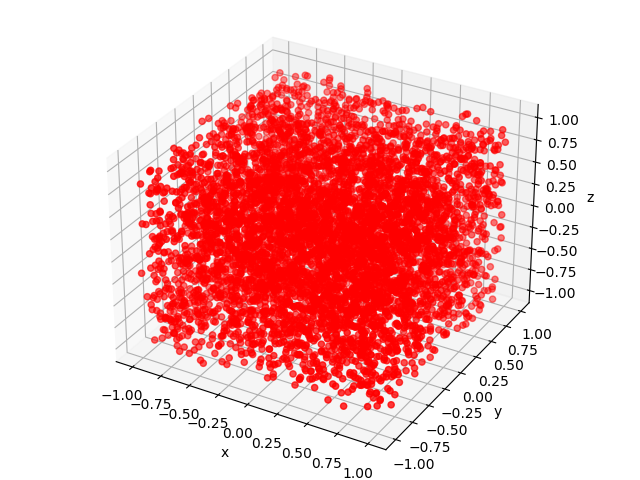

In [2]:
from mpl_toolkits.mplot3d import Axes3D
def three_dimensional_plotter(x_axis,y_axis,z_axis,title):
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(x_axis, y_axis, z_axis, color='r')
    plt.title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
k = np.random.uniform(-1,1, size=(3, 2000, 3))
three_dimensional_plotter(k[0, :], k[1, :], k[2, :], "Random Uniform Distribution in 3D")

3D Graph above shows no regions of greater particle concentration - all points look to have the same density, thus, it appears to have no spectral problems.</p> **3. Attenuation length and mean free path of water without scattering (giving lambda as 45).**</p>For water we want to calculate the attenuation length. The attenuation length or absorption length is the distance $\lambda$ into a material when the probability has dropped to $\frac{1}{e}$ that a particle has not been absorbed. We will have an initial guess of 45cm. To calculate this we will use the inverse distribution an exponential function that will used to calculate thousands of particles that will be arranged to their appropriate bins to be displayed on a histogram. The weighted errors of each bin can be calculated by the standard deviation of the respective bins for multiple iterations then dividing this by the respected mean. Note: $\lambda$ on the second graph is attenuation length.

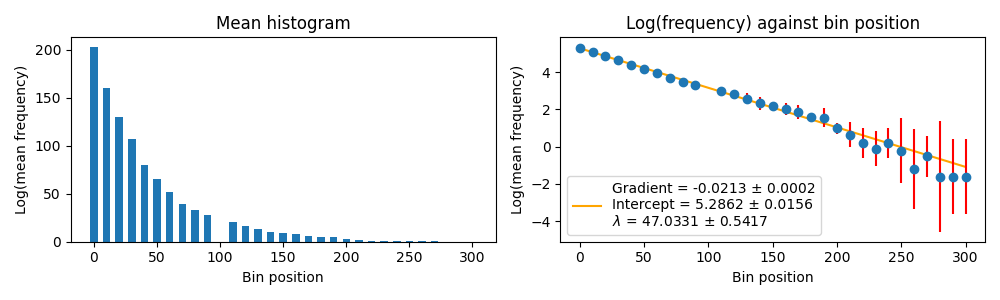

Attenuation length = 47.0331 ± 0.5417


In [3]:
def natural_log_function(random_numbers,lambda_const):
    return -lambda_const*np.log(random_numbers)
def exponential_function(x):
    return np.exp(-x/lambda_original)
    
iterations = 10 # Number of histograms
n_bins = 30        #Number of bins
lambda_original = 45  
frequency = np.zeros((iterations,n_bins))         #Creating an array of size (number of histograms,number of bins)
frequency_mean = np.array([])                       #Creating array of frequency_mean
frequency_std = np.array([])                   #Creating array of frequency_standard deviation
for iterate in range(iterations):       #Iterating through the number of histograms
    exp_dist = natural_log_function((np.random.uniform(size = nparticles)),lambda_original)         #Creating a uniformly random distributed numbers between 0 and 1 then putting it through the natural_log function 
    frequency[iterate,:], r = np.histogram(exp_dist, bins = n_bins, range = (0,300))   #Creates a histogram of 30 bins in a certain range. Plots the natural log of the random numbers.
    r = np.delete(r,len(frequency)) #The x-axis array produces one extra element than the frequency, so we remove the last element in the r array.

for bin_iteration in range(n_bins):          #Iterating over the number of bins
    mean = np.mean(frequency[:,bin_iteration])               #Calculating the mean of each bin
    standard_deviation =  np.std(frequency[:,bin_iteration])   #Calculating the standard deviation of each bin
    frequency_mean = np.append(frequency_mean,mean)              #Appending each of the new calculated means to a new arary
    frequency_std = np.append(frequency_std,standard_deviation)  #Appending each of the new calculated standard deviations to a new arary

fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(121)

frequency_std = np.delete(frequency_std, np.argwhere(frequency_mean ==0))     #Filtering through the newly calculated arrays, removing any values that correspond to the frequency mean = 0
r = np.delete(r,np.argwhere(frequency_mean ==0))                               # ^^ but for parameter r
mean = np.delete(mean,np.argwhere(frequency_mean ==0))                        # ^^ but for parameter mean
error = frequency_std/frequency_mean                                            #Calculating the error for each mean histogram height
ax1.title.set_text("Mean histogram")
ax1.set_xlabel("Bin position")
ax1.set_ylabel("Log(mean frequency)")
ax1.bar(r, frequency_mean,width=6)

ax1 = fig.add_subplot(122)
log_frequency = np.log(frequency_mean)
coefficients, covariance = np.polyfit(r, log_frequency, 1,cov = True,w=1/error)
gradient = coefficients[0]
intercept = coefficients[1]
coefficient_error = np.sqrt(np.diag(covariance))
lambda_error = abs(-1/(gradient) * coefficient_error[0]/gradient)
ax1.plot(r,gradient*r+intercept,color="orange",label="Gradient = {0:.4f} ± {1:.4f}\nIntercept = {2:.4f} ± {3:.4f}\n$\lambda$ = {4:.4f} ± {5:.4f}".format(gradient,coefficient_error[0],intercept,coefficient_error[1],-1/gradient,lambda_error))
ax1.errorbar(r,log_frequency,yerr = error,ecolor = "red",fmt = "o")
ax1.title.set_text("Log(frequency) against bin position")
ax1.set_xlabel("Bin position")
ax1.set_ylabel("Log(mean frequency)")
ax1.legend()
fig.tight_layout()
plt.show()
plt.close(fig)
print("Attenuation length = {0:.4f} ± {1:.4f}".format(-1/gradient,lambda_error))


In the simulation we will use a random spherical distribution for the step length of a neutron. An isotopic function is one which all points are of equal probability, no matter where you observe. I first began by using spherical polar coordinates, on the x component only, $$x = r\sin\theta_{i}\cos\phi_{i},$$ $\pi<\theta_{i}<0$ and $2\pi<\phi_{i}<0$. Variables $\theta_{i}$, $r$ and $\phi_{i}$ are random numbers within their respected range. Using standard spherical polar coordinates, randomly varying $\theta_{i}$ and $\phi_{i}$. However, the points over the sphere did not have equal probability, mainly having larger densities of probabilities at the poles. The resolution to remove this bias is to re-evaluate $<\theta_{i}$ to $$\theta_{i} = \arccos(1-2u_{i}),$$where $u_{i}$ is a random number between [0,1]. This is because the arccos function has a lower concentration at high and low regions (corresponding to the spheres poles) and a greater one at the centre.

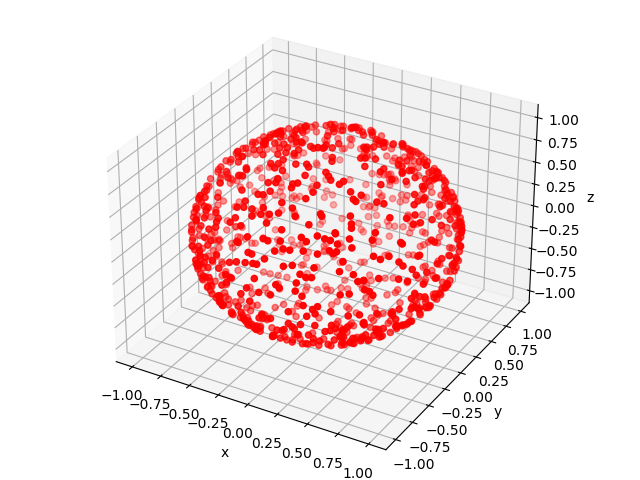

In [4]:
def spherical_random_distribution(radius):
    u = np.random.uniform(0,1)
    v = np.random.uniform(0,1)
    phi = 2*np.pi*u
    theta = np.arccos(1- 2*v)
    x = radius*np.sin(theta) * np.cos(phi)
    y = radius*np.sin(theta) * np.sin(phi)
    z = radius*np.cos(theta)
    return (x,y,z)
coordinates = np.zeros((3,nparticles))
for pointer in range(nparticles):
    x,y,z = spherical_random_distribution(1)
    coordinates[0][pointer] = x
    coordinates[1][pointer] = y
    coordinates[2][pointer] = z
three_dimensional_plotter(coordinates[0], coordinates[1], coordinates[2],"Random Uniform Spherical Distribution in 3D")

As seen above, there are no regions of greater probability density than the rest. It may appear that there is around the circumference of the cirle but that is only the points behind others.</p>Specifically, the first step of the simulation will be generated by samples of isotropic unit vectors, with lengths distributed by an exponential function $e^{\frac{-T}{\lambda}}$, where $T$ is the material's thickness and $\lambda$ is the materials mean free path. To accomplish this, all that is needed is to change the radius of the spherical distribution above to an exponential. The equation for step size of x,y,z $$x = e^{\frac{-x}{\lambda}}\sin\theta_{i}\cos\phi_{i},$$ $$y = e^{\frac{-x}{\lambda}}\sin\theta_{i}\sin\phi_{i},$$ $$z = e^{\frac{-x}{\lambda}}\cos\theta_{i}.$$ 

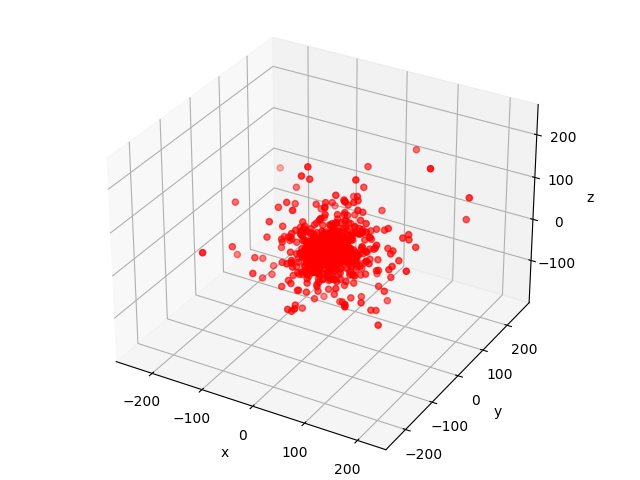

In [5]:
coordinates2 = np.zeros((3,nparticles))
for particle in range(nparticles):
    exponential_radius = natural_log_function(np.random.uniform(),lambda_original)
    x,y,z = spherical_random_distribution(exponential_radius)
    coordinates2[0][particle] = x
    coordinates2[1][particle] = y
    coordinates2[2][particle] = z
three_dimensional_plotter(coordinates2[0], coordinates2[1], coordinates2[2],"isotropic steps with lengths distributed as exponential")

This isotropic spherical function with eponentially weighted radii wlll be used as the first step in the simulation. This is an example of Markov Chain Monte Carlo sampling as it provides a class of algorithms for systematic random sampling from high-dimensional probability distributions.</p>**4.Runing The Simulation for 10cm Slab for Water, Lead and Graphite.**</p>Each material has different properties to one another, in this project we want to extract a material's mean free path ($\lambda$) and probability of absorption ($p_{a}$). To do so a function called get_characteristics_of(material) is generated. The functions inputting parameter, material, is a string expecting either "Water", "Lead" or "Graphite".To calculate the mean free path we need to find the number of absorbing molecules, $n$. </p>The number of absorbing molecules, $$n = \frac{\rho N_{a}}{M},$$ $ρ$ = density $gcm^{-3}$, $N_{a}$ = Avogadros constant $mol^{-1}$, $M$ = Molar Mass $gmol^{-1}$.</p>After we calculate the total macroscopic cross-section, $$\sum = n(\sigma_{a}+\sigma_{s}),$$where $\sigma_{a}$ and $\sigma_{s}$ are the macroscopic cross-sections of absorption and scattering, respectively. These quantities are provided. Finally the mean free path, $$\lambda = \frac{1}{\sum }.$$</p>To calculate the probability of absorption, $$p_{a} = \frac{\sigma_{a}}{\sigma_{a}+\sigma_{b}}.$$ Depending on the inputted material the output will be the corresponding $\lambda$ and $p_{a} $.

In [6]:
def get_characteristics_of(material):
    scaled_n_avogadro=0.6022
    if(material=="Water"):
        sig_a=0.6652   #Barn
        sig_s=103.0    #Barn
        rho  =1.0      #g/cm3
        mmol =18.0153  #Molar mass
    elif(material=="Lead"):
        sig_a=0.158
        sig_s=11.221
        rho  =11.35
        mmol =207.2
    elif(material=="Graphite"):
        sig_a=0.0045
        sig_s=4.74
        rho  =1.67
        mmol =12.011
    else:
        print("Error: Material not found!")
    sig_t    = (sig_a+sig_s)*rho*scaled_n_avogadro/mmol
    lambda_t = 1/sig_t
    p_a      = sig_a/(sig_a+sig_s)
    return(lambda_t,p_a)


<dl>
<dt>What should happen when we run the simulation: </dt>
<dd>1. We define the direction where the thermal neutrons are coming from, posivive x-axis.</dd>
<dd>The material will be placed in this direction too.<dd>
<dd>2. We want to calculate the step length using the isotropic spherical distribution with the exponential distribution as the radii.</dd>
<dd>3. Move particles by the calculated step length.</dd>
<dd>Creating a large array of positions and appending the new positions to keep a history. <dd>
<dd>4. Check if the particle has been absorbed, reflected or transmitted.</dd>
<dd>Absorbed: A random number, $u$, is generated between [0,1] and if it is $<$ the probability of absorption, it is absorbed.<dd>
<dd>Reflected: If the updated position of the particle is $<0$, it is in the opposite direction of the material.<dd>
<dd>Transmitted: If the updated position of the particle is $>$ the material's thickness, it has passed through the material with no interactions.<dd>
<dd>5. If either of these possibilities for the neutron occur, the iterative process will stop for the neutron.</dd>
<dd>6. The process will keep running if the particle is in the range slab thickness>x>0 and if u > probability of absorption. This is because the particle is in the material and will scatter.</dd>
<dd>7. In order to scatter, we must return to step 1. and repeat the process again.</dd>
</dl>

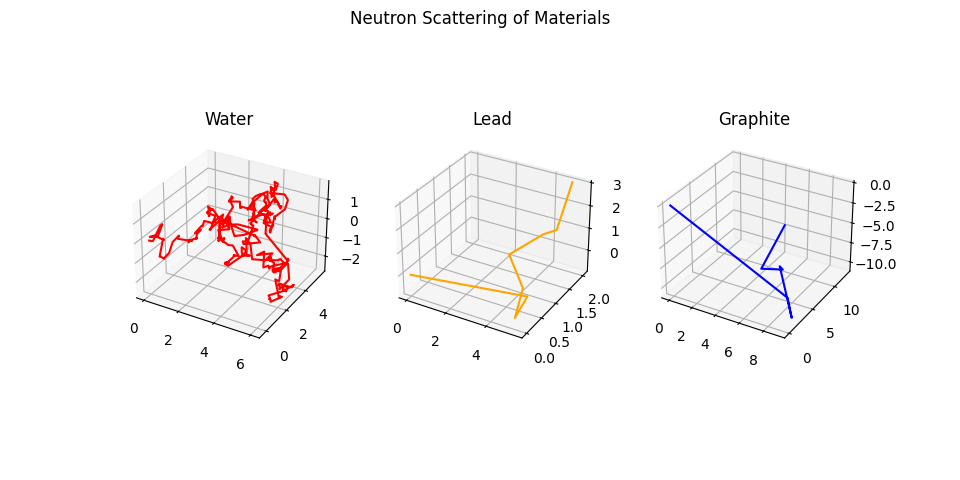

In [7]:
def run_simulation(material,slab_thickness):
    mean_free_path, prob_absorption = get_characteristics_of(material)
    all_particle_trajectories = {}  #Creating a dictionary to store all particles
    for nth_particle in range(nparticles):
        first_particle_step = True
        particle_trajectory = []   #Temporary array to store the nth particles trajectory.
        x = 0                      #Initial conditions of the emitted particle
        y = 0
        z = 0
        particle_trajectory.append((x,y,z))        #Appending trajectory
        x += natural_log_function(np.random.uniform(),mean_free_path)
        #print(x)
        while True:
            if first_particle_step == False:
                isotropic_x_length,isotropic_y_length,isotropic_z_length = spherical_random_distribution(natural_log_function(np.random.uniform(),mean_free_path))
                x += isotropic_x_length
                y += isotropic_y_length
                z += isotropic_z_length
                particle_trajectory.append((x,y,z))
            if x<0: 
                all_particle_trajectories[nth_particle] = "Reflected"
                break
            if x>slab_thickness:
                all_particle_trajectories[nth_particle] = "Transmission"  
                break
            if np.random.uniform() < prob_absorption:  #Absorbed
                all_particle_trajectories[nth_particle] = particle_trajectory
                break
            else:
                first_particle_step = False
    return all_particle_trajectories

def index_finder(searching_value,dictionary):
    indices = []
    i = 0
    for value in dictionary.values():
        if searching_value == "Absorb":
            if type(value) == list:
                indices.append(i)  
        if value == searching_value:
            indices.append(i)
        i += 1
    return indices
all_particle_trajectories = run_simulation("Water",10)
indices_reflected_water = index_finder("Reflected",all_particle_trajectories)
indices_transmission_water = index_finder("Transmission",all_particle_trajectories)
indices_absorb_water = index_finder("Absorb",all_particle_trajectories)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
fig.suptitle('Neutron Scattering of Materials')
plt.title("Water")
x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_water[0]]) 
if len(x_points) < 1:
    x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_water[1]])
ax.plot3D(x_points, y_points, z_points, 'red') 

all_particle_trajectories = run_simulation("Lead",10)
indices_reflected_lead = index_finder("Reflected",all_particle_trajectories)
indices_transmission_lead = index_finder("Transmission",all_particle_trajectories)
indices_absorb_lead = index_finder("Absorb",all_particle_trajectories)

ax1 = fig.add_subplot(1, 3, 2, projection='3d')
plt.title("Lead")
x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_lead[0]]) 
if len(x_points) < 1:
    x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_lead[1]])
ax1.plot3D(x_points, y_points, z_points, 'orange') 

all_particle_trajectories = run_simulation("Graphite",10)
indices_reflected_graphite = index_finder("Reflected",all_particle_trajectories)
indices_transmission_graphite = index_finder("Transmission",all_particle_trajectories)
indices_absorb_graphite = index_finder("Absorb",all_particle_trajectories)

ax2 = fig.add_subplot(1, 3, 3, projection='3d')
plt.title("Graphite")
x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_graphite[0]]) 
if len(x_points) < 1:
    x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_graphite[1]])
ax2.plot3D(x_points, y_points, z_points, 'blue') 
plt.show()

Property |Water |Lead |Graphite 
-----|-----|-----|----- 
Mean Free Path, $cm$ | 0.289|2.633|2.516 
Probability of Absorption | 0.01373|2.633|0.0009485
Cross-Section, $cm^{2}$| 3.464|0.3799|0.3975

In [8]:
def next_step(lambda_t,n):
    r=-lambda_t*np.log(np.random.uniform(size=n))
    theta=np.arccos(np.random.uniform(-1,1,size=n))
    phi=np.random.uniform(0,2*np.pi,size=n)
    x=r*np.sin(theta)*np.cos(phi)
    return(x)

**Determining the fraction of normally-incident neutrons transmitted, reflected, and
absorbed in water, lead and graphite slabs which are 10 cm thick.**</p>Unlike previously, now we want to run the simulation but not record the particles trajectories. To do so we will create large arrays, the size of the decided number of iterations, for keeping count of the number of reflected, absorbed and transmitted neutrons. One more array of the same dimensions will be generated called, x. This array is to store the most recent step and to perform operations on the whole array finding any position that would correspond to one of the three possibilities. These comparison operations are performed by numpy functions due to their speed and efficiency. Any particle that has been transmitted, reflected or absorbed will be counted then deleted from the x array. This will continue until the x array has no more elements inside.</p>The percentage errors on the fraction of neutrons come from the standard deviation divided by the mean of the number of absorbed/transmitted/reflected multiplied by 100. </p>**Below python arrays were used for arrays keeping the number of transmitted, reflected and absorbed thermal neutrons. This is because numpy arrays are slow at appending. However, numpy arrays are very fast at performing operations on large arrays, for example, below lengths is a numpy array because this array will need to be searched for specific values that mean a certain critrea - np.argwhere(). DELETE?**</p>Note: when working with the data, the data's data type in this project are always a float, therefore, we we do not want to perform operations on floats with different data types - e.g foat multiplied by an integer. This is because a float is represented with 32 bits, whereas an integer is 16 bits. In order for the calculation to complete, another 16 bits are needed for the integer thus taking up more processing power. 


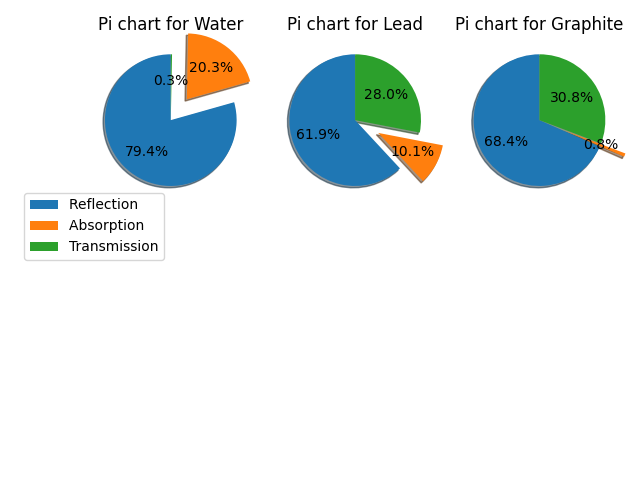

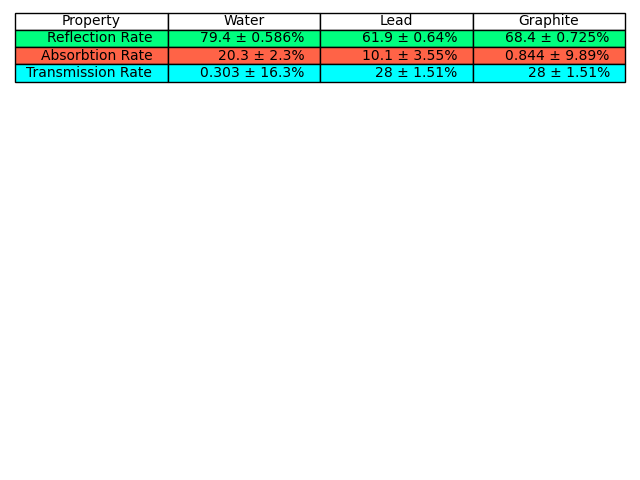

In [9]:
def analyse_proccesses_for(material,n_samples,n_iterations,slab_thickness):
    lambda_t,p_a=get_characteristics_of(material)
    n_reflected=np.zeros(n_iterations)
    n_absorbed=np.zeros(n_iterations)
    n_transmitted=np.zeros(n_iterations)
    
    for iteration in range(n_iterations):#tnrange(n_iterations,desc="Progress",disable=False):
        x=-lambda_t*np.log(np.random.uniform(size=n_samples)) # generate the first step x=-l*log(u)
        while(len(x)>0):
            u=np.random.uniform(size=len(x))
            n_reflected[iteration]+=np.count_nonzero(x<0.0)
            n_transmitted[iteration]+=np.count_nonzero(x>slab_thickness)
            n_absorbed[iteration]+=np.count_nonzero(u[np.argwhere((x>0.0)&(x<slab_thickness))]<p_a)
            x=np.delete(x,np.argwhere((x<0.0)|(x>slab_thickness)|(u<p_a)))
            x+=next_step(lambda_t,len(x))
        
    mean_reflected=np.mean(n_reflected)
    mean_absorbed=np.mean(n_absorbed)
    mean_transmitted=np.mean(n_transmitted)
    threshold=0.000001   #Threshold in place to ensure no division by zero errors
    error_reflected=np.std(n_reflected)*100.0/max(mean_reflected,threshold)
    error_absorbed=np.std(n_absorbed)*100.0/max(mean_absorbed,threshold)
    error_transmitted=np.std(n_transmitted)*100.0/max(mean_transmitted,threshold)
    rate_reflected=mean_reflected*100.0/n_samples
    rate_absorbed=mean_absorbed*100.0/n_samples
    rate_transmitted=mean_transmitted*100.0/n_samples
    return(rate_reflected, error_reflected ,\
           rate_absorbed, error_absorbed, \
           rate_transmitted, error_transmitted)       

reflected_rate_water,error_reflected_water,absorbed_rate_water,error_absorbed_water,transmitted_rate_water,error_transmitted_water = analyse_proccesses_for("Water",10000,10,10)

explode = (0, .4, 0) 
fig = plt.figure()
ax1 = fig.add_subplot(231)
plt.title("Pi chart for Water")
y = np.array([reflected_rate_water,absorbed_rate_water,transmitted_rate_water])
ax1.pie(y, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

reflected_rate_lead,error_reflected_lead,absorbed_rate_lead,error_absorbed_lead,transmitted_rate_lead,error_transmitted_lead = analyse_proccesses_for("Lead",10000,10,10)
ax2 = fig.add_subplot(232)
plt.title("Pi chart for Lead")
y = np.array([reflected_rate_lead,absorbed_rate_lead,transmitted_rate_lead])
ax2.pie(y, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)

reflected_rate_graphite,error_reflected_graphite,absorbed_rate_graphite,error_absorbed_graphite,transmitted_rate_graphite,error_transmitted_graphite = analyse_proccesses_for("Graphite",10000,10,10)
ax3 = fig.add_subplot(233)
plt.title("Pi chart for Graphite")
y = np.array([reflected_rate_graphite,absorbed_rate_graphite,transmitted_rate_graphite])
mylabels = ["Reflection ", "Absorption ", "Transmission"]
ax3.pie(y, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.legend(labels=mylabels,bbox_to_anchor=[0.5, .1])
plt.tight_layout()
plt.show() 

fig, ax = plt.subplots()
#ax4 = fig.add_subplot(234)
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#create data
df = pd.DataFrame([["Reflection Rate","{0:.3g} ± {1:.3g}%".format(reflected_rate_water,error_reflected_water),"{0:.3g} ± {1:.3g}%".format(reflected_rate_lead,error_reflected_lead),"{0:.3g} ± {1:.3g}%".format(reflected_rate_graphite,error_reflected_graphite)],
                   ["Absorbtion Rate","{0:.3g} ± {1:.3g}%".format(absorbed_rate_water,error_absorbed_water),"{0:.3g} ± {1:.3g}%".format(absorbed_rate_lead,error_absorbed_lead),"{0:.3g} ± {1:.3g}%".format(absorbed_rate_graphite,error_absorbed_graphite)],
                   ["Transmission Rate","{0:.3g} ± {1:.3g}%".format(transmitted_rate_water,error_transmitted_water),"{0:.3g} ± {1:.3g}%".format(transmitted_rate_lead,error_transmitted_lead),"{0:.3g} ± {1:.3g}%".format(transmitted_rate_lead,error_transmitted_lead)]], columns=['Property','Water', 'Lead','Graphite'])
#create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='top',cellColours=[['springgreen','springgreen','springgreen','springgreen'],['tomato','tomato','tomato','tomato'],['aqua','aqua','aqua','aqua']])
table.auto_set_font_size(False)
table.set_fontsize(10)
#display table
plt.tight_layout()
plt.show()


**How does error vary with number of simulated neutrons?**</p>To accomplish this we need to generate a function which, depending on the material and on the decided process (absorption,reflection or transmission), will return the error rate of the process. This function is vary_neutron_number(). After all we need to do is call this function, plot the outputs and fit it to the equation $$\sigma_{error} = \frac{A}{\sqrt{N}},$$where $A$ is the amplitude (the fitting parameter) and $N$ is the number of neutrons.

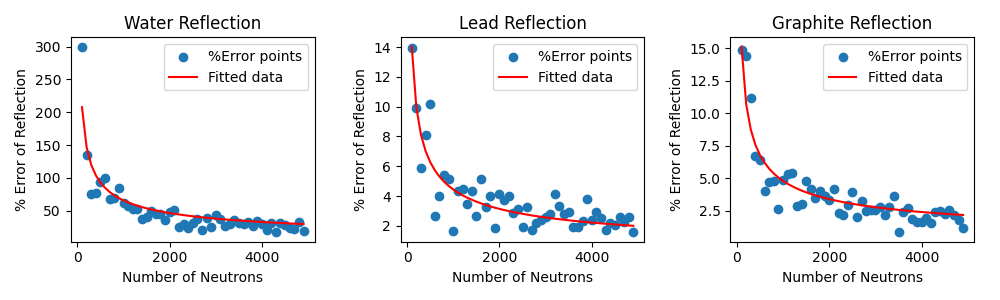

The constants of proportionality, A, for water, lead and graphite reflection are (2077.41 ± 84.35), (140.33 ± 5.30),(151.17 ± 4.88), respectively.


In [10]:
def vary_neutron_number(material,process):
    varying_neutron_number = []#np.array([])
    y_array = [] #np.array([])
    if process == "Reflected":
        index = 1
    if process == "Transmitted":
        index = 3
    else:
        index = 5
    for number in range(100,5000,100):
        varying_neutron_number.append(number)
        y_array.append(analyse_proccesses_for(material,number,10,10)[index])
    return varying_neutron_number,y_array
def one_over_sqrt_x(varying_neutron_number,A):
    return A *1 /np.sqrt(varying_neutron_number)
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
varying_neutron_number,error_reflection_water = vary_neutron_number("Water","Reflection")
ax1.scatter(varying_neutron_number,error_reflection_water,label = "%Error points")
parameters_water, covariance = curve_fit(one_over_sqrt_x, varying_neutron_number, error_reflection_water)
errors_water = np.sqrt(np.diag(covariance))
ax1.plot(varying_neutron_number,one_over_sqrt_x(varying_neutron_number,parameters_water[0]),color='red',label="Fitted data")
ax1.set_title("Water Reflection")
ax1.set_ylabel("% Error of Reflection")
ax1.set_xlabel("Number of Neutrons")
ax1.legend()
ax2 = fig.add_subplot(132)
varying_neutron_number,error_reflection_lead = vary_neutron_number("Lead","Reflection")
ax2.scatter(varying_neutron_number,error_reflection_lead,label = "%Error points")
ax2.set_title("Lead Reflection")
parameters_lead, covariance = curve_fit(one_over_sqrt_x, varying_neutron_number, error_reflection_lead)
errors_lead = np.sqrt(np.diag(covariance))
ax2.plot(varying_neutron_number,one_over_sqrt_x(varying_neutron_number,parameters_lead[0]),color='red',label="Fitted data")
ax2.set_xlabel("Number of Neutrons")
ax2.set_ylabel("% Error of Reflection")
ax2.legend()
ax3 = fig.add_subplot(133)
varying_neutron_number,error_reflection_graphite = vary_neutron_number("Graphite","Reflection")
ax3.scatter(varying_neutron_number,error_reflection_graphite,label = "%Error points")
plt.tight_layout()
ax3.set_title("Graphite Reflection")
ax3.set_xlabel("Number of Neutrons")
ax3.set_ylabel("% Error of Reflection")
parameters_graphite, covariance = curve_fit(one_over_sqrt_x, varying_neutron_number, error_reflection_graphite)
errors_graphite = np.sqrt(np.diag(covariance))
ax3.plot(varying_neutron_number,one_over_sqrt_x(varying_neutron_number,parameters_graphite[0]),color='red',label="Fitted data")
ax3.legend()
plt.tight_layout()
plt.show()
print("The constants of proportionality, A, for water, lead and graphite reflection are ({0:.2f} ± {1:.2f}), ({2:.2f} ± {3:.2f}),({4:.2f} ± {5:.2f}), respectively.".format(parameters_water[0],errors_water[0],parameters_lead[0],errors_lead[0],parameters_graphite[0],errors_graphite[0]))

As the number of neutrons increase, the error percentage for reflection decreases logarithmically. Plotting over the erroneous data is a fit of $\frac{A}{\sqrt{N}}$, where N is the number of neutrons and A is the fitting parameter, the coefficient. By successfully producing a fit we can clearly confirm the relationship $\alpha \frac{1}{\sqrt{N}}$, as previously stated for the errors of a Monte Carlo method. Plots for transmission and absorption can also be performed which give the same inverse proportinal relationship.</p>**5. Thickness variation</p>Calculate the variation in neutron transmission, reflection and absorption with slab
thickness for the three materials and determine the characteristic attenuation lengths for the
three materials from the transmitted intensity, with estimated errors.**</p>The previously defined function analyse_proccesses_for() has an inputting parameter slab_thickness and outputs arrays of rates of absorption/transmission/reflection. By creating a range of thicknesses and iterating through, passing each one into the analyse_proccesses_for function and storing the rate of transmission and rate of transmission error, we will have an array of errors, an array of rates of transmissions and an array of thicknesses. </p>To calculate the attenuation length:</p>The transmission rates are of the relation $$Transmission\,rate = e^{\frac{-T}{\lambda}},$$ applying the natural log to each side $$\ln({Transmission\,rate}) = \frac{-T}{\lambda}$$ and making $\lambda$ the subject $$\lambda = \frac{-T}{\ln({Transmission\,rate})}.$$This equation is the negative reciprocal of the gradient for a graph of $\ln({Transmission\,rate})$ against $T$.

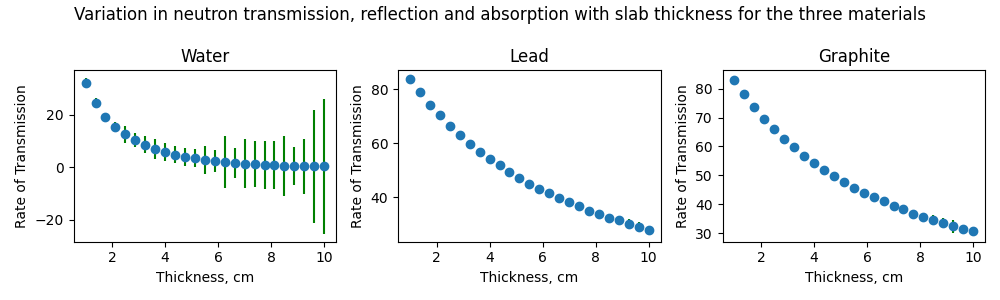

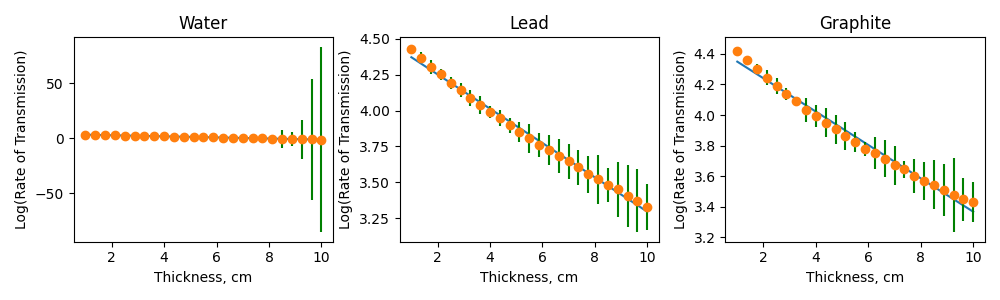

Attenuation length of water = (2.01 ± 0.08)dB/cm
Attenuation length of lead = (8.35 ± 0.01)dB/cm
Attenuation length of graphite = (8.35 ± 0.01)dB/cm


In [11]:
transmitted_array_lead = np.array([])
transmitted_array_graphite = np.array([])
transmitted_array_water = np.array([])
transmitted_error_water = np.array([])
transmitted_error_lead = np.array([])
transmitted_error_graphite = np.array([])
range_thickness = np.linspace(1,10,num=25)
for x in range_thickness:
    rate_reflected,error_reflected,rate_absorbed,error_absorbed,rate_transmitted,error_transmitted = analyse_proccesses_for("Water",10000,10,x)
    transmitted_array_water = np.append(transmitted_array_water,rate_transmitted)
    transmitted_error_water = np.append(transmitted_error_water,error_transmitted)
    
    rate_reflected,error_reflected,rate_absorbed,error_absorbed,rate_transmitted,error_transmitted = analyse_proccesses_for("Lead",10000,10,x)
    transmitted_array_lead = np.append(transmitted_array_lead,rate_transmitted)
    transmitted_error_lead = np.append(transmitted_error_lead,error_transmitted)
    
    rate_reflected,error_reflected,rate_absorbed,error_absorbed,rate_transmitted,error_transmitted = analyse_proccesses_for("Graphite",10000,10,x)
    transmitted_array_graphite = np.append(transmitted_array_graphite,rate_transmitted)
    transmitted_error_graphite = np.append(transmitted_error_graphite,error_transmitted)
    
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
ax1.set_title("Water")
ax1.set_xlabel("Thickness, cm")
ax1.set_ylabel("Rate of Transmission")
ax1.errorbar(range_thickness,transmitted_array_water,yerr = transmitted_error_water,fmt="o",ls = "None",ecolor="green")
ax2 = fig.add_subplot(132)
ax2.set_title("Lead")
ax2.set_xlabel("Thickness, cm")
ax2.set_ylabel("Rate of Transmission")
ax2.errorbar(range_thickness,transmitted_array_lead,yerr = transmitted_error_lead,fmt="o",ls = "None",ecolor="green")
fig.suptitle('Variation in neutron transmission, reflection and absorption with slab thickness for the three materials')
ax3 = fig.add_subplot(133)
ax3.set_title("Graphite")
ax3.set_xlabel("Thickness, cm")
ax3.set_ylabel("Rate of Transmission")
ax3.errorbar(range_thickness,transmitted_array_graphite,yerr = transmitted_error_graphite,fmt="o",ls = "None",ecolor="green")
plt.tight_layout()
plt.show()
plt.close(fig)
##############################################
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
returns = np.polyfit(range_thickness, np.log(transmitted_array_water), 1,full=True)
slope_water = returns[0][0]
intercept_water = returns[0][1]
slope_water_error = returns[1]
ax1.plot(range_thickness,slope_water*range_thickness + intercept_water)
ax1.errorbar(range_thickness,np.log(transmitted_array_water),yerr =np.log(transmitted_array_water) * transmitted_error_water/transmitted_array_water,fmt="o",ls = "None",ecolor="green")
ax1.set_xlabel("Thickness, cm")
ax1.set_title("Water")
ax1.set_ylabel("Log(Rate of Transmission)")
ax2 = fig.add_subplot(132)
returns= np.polyfit(range_thickness, np.log(transmitted_array_lead), 1,full=True)
slope_lead = returns[0][0]
intercept_lead = returns[0][1]
slope_lead_error = returns[1]
ax2.plot(range_thickness,slope_lead*range_thickness + intercept_lead)
ax2.errorbar(range_thickness,np.log(transmitted_array_lead),yerr =np.log(transmitted_array_lead) * transmitted_error_lead/transmitted_array_lead,fmt="o",ls = "None",ecolor="green")
ax2.set_xlabel("Thickness, cm")
ax2.set_title("Lead")
ax2.set_ylabel("Log(Rate of Transmission)")
ax3 = fig.add_subplot(133)
returns = np.polyfit(range_thickness, np.log(transmitted_array_graphite), 1,full=True)
slope_graphite = returns[0][0]
intercept_graphite = returns[0][1]
slope_graphite_error = returns[1]
ax3.plot(range_thickness,slope_graphite*range_thickness + intercept_graphite)
ax3.errorbar(range_thickness,np.log(transmitted_array_graphite),yerr =np.log(transmitted_array_graphite) * transmitted_error_graphite/transmitted_array_graphite,fmt="o",ls = "None",ecolor="green")
ax3.set_title("Graphite")
ax3.set_xlabel("Thickness, cm")
ax3.set_ylabel("Log(Rate of Transmission)")
plt.tight_layout()
plt.show()
print("Attenuation length of water = ({0:.2f} ± {1:.2f})dB/cm".format(-1/slope_water,slope_water_error[0]))
print("Attenuation length of lead = ({0:.2f} ± {1:.2f})dB/cm".format(-1/slope_lead,slope_lead_error[0]))
print("Attenuation length of graphite = ({0:.2f} ± {1:.2f})dB/cm".format(-1/slope_lead,slope_lead_error[0]))

**6. Conclusion and error analysis**

**Bonus: Woodcock method**</p>The Woodcock method utilises the rejection method for sampling virtual collisions as a method to remove collision distance sampling at material boundaries. For this method the experimental set-up is different. Instead of having one material of thickness T, there are two materials side-by-side both of thickness T.</p>Steps are as follows for material 1:
<dl>
<dd>1. Generate the first step using the isotropic spherical functin with the radii distributed exponentially..</dd>
<dd>2. Generate a random number, v.</dd>
<dd>3. If v $<$ probability of it being ficticious</dd>
<dd>   3.1 YES - Ficticious step</dd>
<dd>   3.2 NO - Continue to step 4</dd>
<dd>4. Generate a random number, u</dd>
<dd>5. If u $<$ probability of absorption in material 1</dd>
<dd>   5.1 YES - Absorbed +1, end loop</dd>
<dd>   5.2 NO - Return to step 1 </dd>
<dl>
For material 2, steps are the same as the neutron but if a particle return to material 1, repeat the steps above.

In [12]:
def woodcock_method(lambda_1,lambda_2,sigma_1,sigma_2):
    length = 10
    sigma_T = np.maximum(sigma_1,sigma_2)
    lambda_T = np.minimum(lambda_1,lambda_2)
    theta = np.arccos(-1,1,nparticles)
    phi = np.np.random.uniform(0,2*np.pi,nparticles)
    if np.random.uniform(0,1) > sigma_1/sigma_T: #if Ficticious
        theta = theta_prev
        phi = phi_prev
        r=-lambda_t*np.log(np.random.uniform(size=n))
        x=r*np.sin(theta)*np.cos(phi)
    if np.random.uniform(0,1) < prob_absorption_1:
        absorbed +=1
        break
    else:
        x = next_step(lambda_t,nparticles)

<class 'SyntaxError'>: 'break' outside loop (<ipython-input-12-62e6ddc6b597>, line 14)

Simulation but for a cube

In [13]:
def run_simulation_new(material,slab_thickness):
    mean_free_path, prob_absorption = get_characteristics_of(material)
    all_particle_trajectories = {}  #Creating a dictionary to store all particles
    for nth_particle in range(nparticles):
        first_particle_step = True
        particle_trajectory = []   #Temporary array to store the nth particles trajectory.
        x = 0                      #Initial conditions of the emitted particle
        y = 0
        z = 0
        particle_trajectory.append((x,y,z))        #Appending trajectory
        x += natural_log_function(np.random.uniform(),mean_free_path)
        #print(x)
        while True:
            if first_particle_step == False:
                isotropic_x_length,isotropic_y_length,isotropic_z_length = spherical_random_distribution(natural_log_function(np.random.uniform(),mean_free_path))
                x += isotropic_x_length
                y += isotropic_y_length
                z += isotropic_z_length
                particle_trajectory.append((x,y,z))
            if x<0 or y<0 or z<0: 
                all_particle_trajectories[nth_particle] = "Reflected"
                break
            if x>slab_thickness or y>slab_thickness or z>slab_thickness:
                all_particle_trajectories[nth_particle] = "Transmission"  
                break
            if np.random.uniform() < prob_absorption:  #Absorbed
                all_particle_trajectories[nth_particle] = particle_trajectory
                break
            else:
                first_particle_step = False
    return all_particle_trajectories



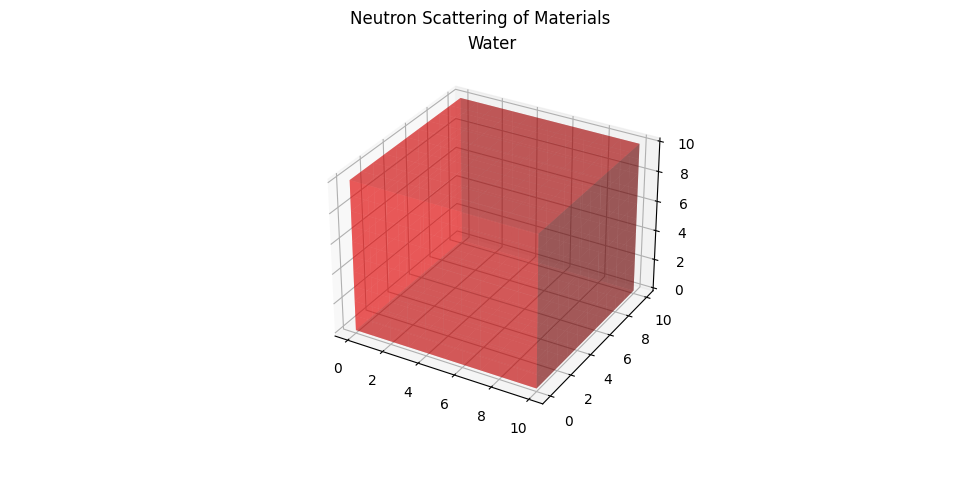

In [18]:
all_particle_trajectories = run_simulation_new("Lead",10)
indices_reflected_water = index_finder("Reflected",all_particle_trajectories)
indices_transmission_water = index_finder("Transmission",all_particle_trajectories)
indices_absorb_water = index_finder("Absorb",all_particle_trajectories)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Neutron Scattering of Materials')
plt.title("Water")
x_points, y_points,z_points = zip(*all_particle_trajectories[indices_absorb_water[0]]) 

#plt.show()

# Create axis
axes = [10,10,10]
  
# Create Data
data = np.ones(axes, dtype=bool)
  
# Controll Tranperency
alpha = 0.4
  
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
  
colors[:] = [1, 0, 0, alpha]  # red
  
# Plot figure
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax.voxels(data, facecolors=colors)
plt.show()